In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data =pd.read_csv("coucou3_Charles.csv")
data.head()

,1,-4.490986,5.665841,7.820755,0.025814,0.935106,-0.221158,0.946339,-2.012087,-0.506871,0.784199,-0.620365,0.010532,0.008332
0,2,-0.135448,0.713422,-1.278504,0.016981,0.923059,-0.234811,0.820424,-0.312610,0.374383,0.789441,-0.613762,0.007037,0.005471
1,3,-0.147226,0.715866,-1.304099,0.031436,0.914226,-0.263724,1.323934,-0.312610,0.059671,0.799005,-0.601098,0.013195,0.009927
2,5,-0.147226,0.718309,-1.306659,0.020997,0.940728,-0.259708,1.323934,1.449899,0.122554,0.794318,-0.607398,0.008946,0.006860
3,6,-0.149582,0.713422,-1.293861,0.016177,0.944743,-0.242842,0.946339,1.575665,0.185586,0.794878,-0.606659,0.009168,0.007015
4,7,-0.144871,0.713422,-1.260587,0.023405,0.932697,-0.245251,1.323934,1.764612,0.626214,0.794611,-0.607007,0.009289,0.007038


In [4]:
data_roll = pd.read_csv("Roll.csv")
data_pitch = pd.read_csv("Pitch.csv")
data_yaw = pd.read_csv("Yaw.csv")

In [26]:
data_new = pd.concat((data_roll, data_pitch, data_yaw), ignore_index = False, join= 'outer', axis= 1)
data_new.columns = ('ROLL','PITCH','YAW')

In [27]:
data_new.head()

,ROLL,PITCH,YAW
0,0.143667,0.005436,0.016768
1,0.136874,0.001881,0.012857
2,0.130165,-0.001927,0.009727
3,0.123600,-0.005828,0.006884
4,0.117064,-0.009415,0.003805


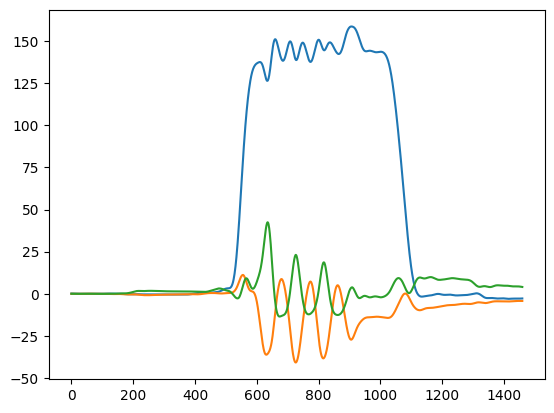

In [28]:
plt.plot(data_new)

In [7]:
data_new.shape

(4380, 3)

In [8]:
data_np = data_new.dropna().head(100)

In [9]:
data_np.head()

,0.150548791331218,8.856356518730291E-003,2.152219028280911E-002


In [10]:
for i in data_np.columns:
    print(data_np[i].isna().sum())

0
0
0


In [11]:
data = data.iloc[:, :10]
data.columns = ['NB','X', 'Y', 'Z','acc_X', 'acc_Y', 'acc_Z','gyro_X', 'gyro_Y', 'gyro_Z',]
data.head()

,NB,X,Y,Z,acc_X,acc_Y,acc_Z,gyro_X,gyro_Y,gyro_Z
0,2,-0.135448,0.713422,-1.278504,0.016981,0.923059,-0.234811,0.820424,-0.312610,0.374383
1,3,-0.147226,0.715866,-1.304099,0.031436,0.914226,-0.263724,1.323934,-0.312610,0.059671
2,5,-0.147226,0.718309,-1.306659,0.020997,0.940728,-0.259708,1.323934,1.449899,0.122554
3,6,-0.149582,0.713422,-1.293861,0.016177,0.944743,-0.242842,0.946339,1.575665,0.185586
4,7,-0.144871,0.713422,-1.260587,0.023405,0.932697,-0.245251,1.323934,1.764612,0.626214


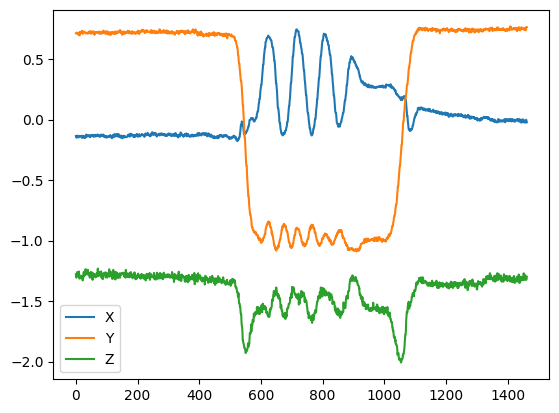

In [12]:
data['X'].plot(label = 'X')
data['Y'].plot(label = 'Y')
data['Z'].plot(label = 'Z')
plt.legend()
plt.show()

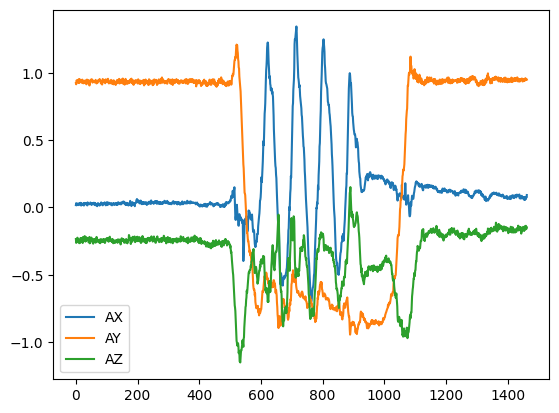

In [13]:
data['acc_X'].plot(label = 'AX')
data['acc_Y'].plot(label = 'AY')
data['acc_Z'].plot(label = 'AZ')
plt.legend()
plt.show()

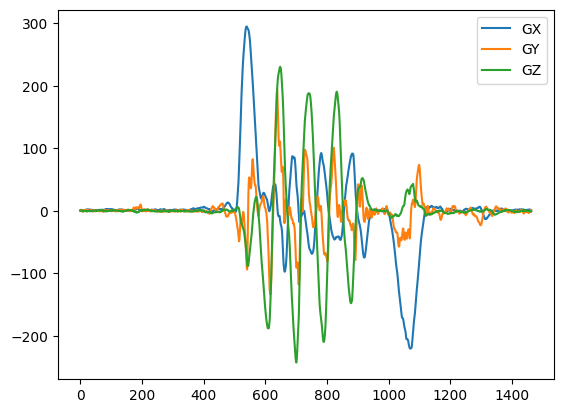

In [14]:
fig,ax = plt.subplots()
data['gyro_X'].plot(label = 'GX')
data['gyro_Y'].plot(label = 'GY')
data['gyro_Z'].plot(label = 'GZ')
plt.legend()
plt.show()

C:\Users\charl\AppData\Local\Temp\ipykernel_20892\1059847874.py:145: RuntimeWarning: overflow encountered in scalar multiply
  roll_minus += roll_dot * P_00
C:\Users\charl\AppData\Local\Temp\ipykernel_20892\1059847874.py:147: RuntimeWarning: overflow encountered in scalar multiply
  yaw_minus += yaw_dot * P_00
C:\Users\charl\AppData\Local\Temp\ipykernel_20892\1059847874.py:146: RuntimeWarning: overflow encountered in scalar multiply
  pitch_minus += pitch_dot * P_00
c:\Users\charl\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:1448: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
c:\Users\charl\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:1741: RuntimeWarning: invalid value encountered in remainder
  ddmod = mod(dd - interval_low, period) + interval_low


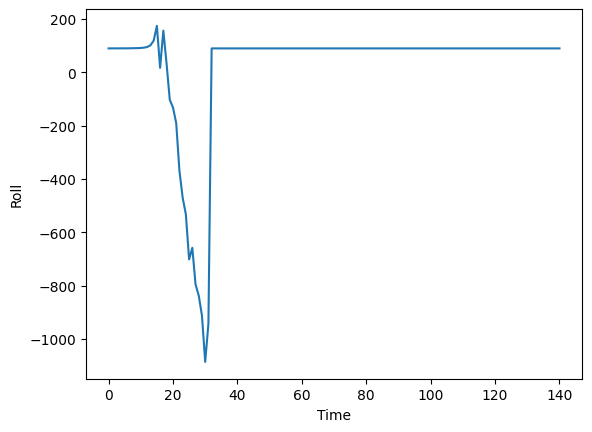

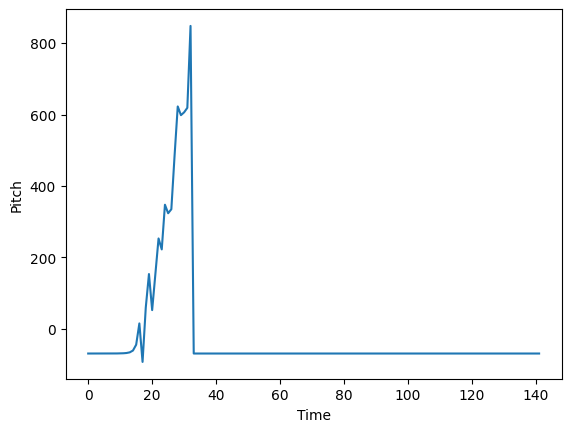

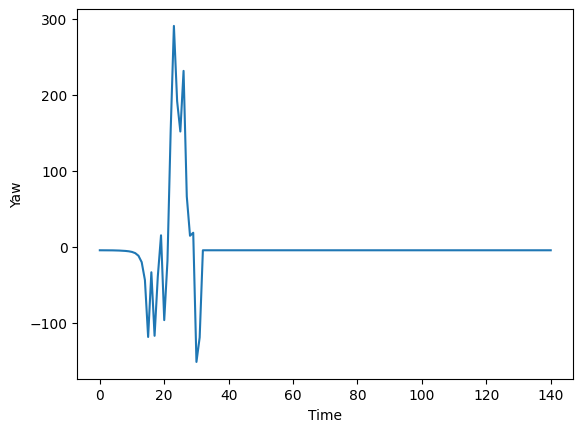

In [15]:
import pandas as pd
import numpy as np
import math
from scipy.signal import butter, lfilter

# Read CSV file
df = pd.read_csv('coucou2_Charles.csv')

# Extract relevant columns from the DataFrame
Time = df.iloc[1:, 0]
s = len(Time)

# Gyro sensor output
GYRO1_X_orig = df.iloc[1:, 7].to_numpy()
GYRO1_Y_orig = df.iloc[1:, 8].to_numpy()
GYRO1_Z_orig = df.iloc[1:, 9].to_numpy()

# Bias correction
meanGYR1_X = np.mean(GYRO1_X_orig[1:100])
meanGYR1_Y = np.mean(GYRO1_Y_orig[1:100])
meanGYR1_Z = np.mean(GYRO1_Z_orig[1:100])

gyr1_X = GYRO1_X_orig - meanGYR1_X
gyr1_Y = GYRO1_Y_orig - meanGYR1_Y
gyr1_Z = GYRO1_Z_orig - meanGYR1_Z

# Unit conversion (degree/s to rad/s)
gyr1_X = gyr1_X * (2 * np.pi / 360)
gyr1_Y = gyr1_Y * (2 * np.pi / 360)
gyr1_Z = gyr1_Z * (2 * np.pi / 360)

# Accelerometer sensor output
acc1_x_orig = df.iloc[1:, 4].to_numpy()
acc1_y_orig = df.iloc[1:, 5].to_numpy()
acc1_z_orig = df.iloc[1:, 6].to_numpy()

# Accelerometer normalization
AC1 = math.sqrt(np.mean(acc1_x_orig[1:100]) ** 2 + np.mean(acc1_y_orig[1:100]) ** 2 + np.mean(acc1_z_orig[1:100]) ** 2)
acc1_x = acc1_x_orig / AC1
acc1_y = acc1_y_orig / AC1
acc1_z = acc1_z_orig / AC1

# Unit conversion (G to m/s^2)
acc1_x = acc1_x * 9.80665
acc1_y = acc1_y * 9.80665
acc1_z = acc1_z * 9.80665

# Magnetometer sensor output
com1_x = df.iloc[1:, 1].to_numpy()
com1_y = df.iloc[1:, 2].to_numpy()
com1_z = df.iloc[1:, 3].to_numpy()

# Unit conversion (gauss to mgauss)
com1_x = com1_x * 1000
com1_y = com1_y * 1000
com1_z = com1_z * 1000

# Parameter correction
Gx1 = 300
bx1 = 100
Gy1 = 300
by1 = 100
Gz1 = 300
bz1 = 100

com1_X = (com1_x - bx1) / Gx1
com1_Y = (com1_y - by1) / Gy1
com1_Z = (com1_z - bz1) / Gz1

# Aligning sensor axes
gyr1axis_x = gyr1_X
gyr1axis_y = -gyr1_Z
gyr1axis_z = gyr1_Y

gyr1_X = gyr1axis_x
gyr1_Y = gyr1axis_y
gyr1_Z = gyr1axis_z

acc1axis_x = acc1_x
acc1axis_y = -acc1_z
acc1axis_z = acc1_y

acc1_x = acc1axis_x
acc1_y = acc1axis_y
acc1_z = acc1axis_z

com1axis_x = com1_X
com1axis_y = -com1_Z
com1axis_z = com1_Y

com1_x = com1axis_x
com1_y = com1axis_y
com1_z = com1axis_z

# Low-pass filter
fc = 1  # Cutoff frequency
fs = 100  # Sampling frequency
order = 2  # Filter order
b, a = butter(order, fc / (fs / 2), btype='low')  # Compute filter coefficients

# Apply filter
gyr1_X_filtered = lfilter(b, a, gyr1_X)
gyr1_Y_filtered = lfilter(b, a, gyr1_Y)
gyr1_Z_filtered = lfilter(b, a, gyr1_Z)

# Attitude estimation
roll = np.zeros(s)
pitch = np.zeros(s)
yaw = np.zeros(s)

# Initialize initial attitude based on accelerometer readings
roll[0] = math.atan2(acc1_y[0], acc1_z[0])
pitch[0] = math.atan(-acc1_x[0] / (acc1_y[0] * math.sin(roll[0]) + acc1_z[0] * math.cos(roll[0])))

# Kalman filter parameters
Q_angle = 0.001
Q_gyro = 0.003
R_angle = 0.03

P_00 = 0
P_01 = 0
P_10 = 0
P_11 = 0

# Kalman filter
for i in range(s):
    if i == 0 or i==1:
        dt = 0  # Handle the first iteration separately
    else:
        dt = Time[i] - Time[i - 1]
    
    roll_minus = roll[i - 1] + (gyr1_X_filtered[i - 1] * dt)
    pitch_minus = pitch[i - 1] + (gyr1_Y_filtered[i - 1] * dt)
    yaw_minus = yaw[i - 1] + (gyr1_Z_filtered[i - 1] * dt)

    roll_dot = gyr1_X_filtered[i] - roll_minus
    pitch_dot = gyr1_Y_filtered[i] - pitch_minus
    yaw_dot = gyr1_Z_filtered[i] - yaw_minus

    P_00 += dt * (2 * P_01 + dt * P_11 - P_00 * Q_angle)
    P_01 -= dt * P_11
    P_10 -= dt * P_11
    P_11 += dt * Q_gyro

    roll_minus += roll_dot * P_00
    pitch_minus += pitch_dot * P_00
    yaw_minus += yaw_dot * P_00

    roll[i] = roll_minus
    pitch[i] = pitch_minus
    yaw[i] = yaw_minus

def unwrap(data):
    unwrapped_data = np.unwrap(data)
    return unwrapped_data

# Convertir en degrés
def convert_to_degrees(data):
    converted_data = data * 360 / (2 * np.pi)
    return converted_data

# Charger les données YAW1, PITCH1, ROLL1

# Appliquer la fonction unwrap
YAW1 = unwrap(yaw)
PITCH1 = unwrap(pitch)
ROLL1 = unwrap(roll)

# Convertir en degrés
Yaw = convert_to_degrees(YAW1)
Roll = convert_to_degrees(ROLL1)
Pitch = convert_to_degrees(PITCH1)

# Calculer les moyennes
Yaw_mean = np.mean(Yaw[1:100])
Roll_mean = np.mean(Roll[1:100])
Pitch_mean = np.mean(Pitch[1:100])

# Soustraire les moyennes
Yaw = Yaw - Yaw_mean
Roll = Roll - Roll_mean
Pitch = Pitch - Pitch_mean

# Tracer les graphiques
plt.figure(1)
plt.plot(Roll)
plt.xlabel('Time')
plt.ylabel('Roll')

plt.figure(2)
plt.plot(Pitch)
plt.xlabel('Time')
plt.ylabel('Pitch')

plt.figure(3)
plt.plot(Yaw)
plt.xlabel('Time')
plt.ylabel('Yaw')

# Afficher les graphiques
plt.show()

In [16]:
import numpy as np
import csv
import math
import matplotlib.pyplot as plt

#-----csvファイルの読み込み-----
with open('coucou3_Charles.csv', 'r') as file:
    reader = csv.reader(file)
    M = list(reader)

M = np.array(M)

#%-----行列の大きさを調べる-----%
nr, nc = M.shape

Ts = 0.01  #%サンプリング周期[s]
f = 1 / Ts  #%サンプリング周波数[Hz]
Time = M[1:nr, 0]
s = nr - 2

#%-----センサ出力-----%
#%ジャイロセンサ出力
GYRO1_X_orig = M[1:nr, 7]  #%センサ1
GYRO1_Y_orig = M[1:nr, 8]
GYRO1_Z_orig = M[1:nr, 9]

#%%%バイアス補正
meanGYR1_X = np.mean(GYRO1_X_orig[1:100])  #%センサ1       Mの静止状態の平均値をすべての値から引く（ここでは2から100とした）
meanGYR1_Y = np.mean(GYRO1_Y_orig[1:100])
meanGYR1_Z = np.mean(GYRO1_Z_orig[1:100])

gyr1_X = GYRO1_X_orig - meanGYR1_X  #%センサ1
gyr1_Y = GYRO1_Y_orig - meanGYR1_Y
gyr1_Z = GYRO1_Z_orig - meanGYR1_Z

#%%%単位変換(degree/s→rad/s)
gyr1_X = gyr1_X * (2 * math.pi / 360)  #%センサ1
gyr1_Y = gyr1_Y * (2 * math.pi / 360)
gyr1_Z = gyr1_Z * (2 * math.pi / 360)

#%加速度センサ出力
acc1_x_orig = M[1:nr, 4]  #%センサ1
acc1_y_orig = M[1:nr, 5]
acc1_z_orig = M[1:nr, 6]

#%%%加速度正規化
AC1 = math.sqrt(np.mean(acc1_x_orig[1:100]) * np.mean(acc1_x_orig[1:100]),
                np.mean(acc1_y_orig[1:100]) * np.mean(acc1_y_orig[1:100]),
                np.mean(acc1_z_orig[1:100]) * np.mean(acc1_z_orig[1:100]).sum())

acc1_x = acc1_x_orig / AC1
acc1_y = acc1_y_orig / AC1
acc1_z = acc1_z_orig / AC1

# Conversion d'unités (G → m/s^2)
acc1_x = acc1_x * 9.80665
acc1_y = acc1_y * 9.80665
acc1_z = acc1_z * 9.80665

# Estimation des angles de roulis, tangage et lacet
roll = np.zeros(s)
pitch = np.zeros(s)
yaw = np.zeros(s)

for i in range(s):
    acc_total_vector = math.sqrt(acc1_x[i]**2 + acc1_y[i]**2 + acc1_z[i]**2)
    pitch[i] = math.asin(-acc1_x[i] / acc_total_vector)
    roll[i] = math.atan(acc1_y[i] / acc1_z[i])
    mag_x = com1_x[i] * math.cos(pitch[i]) + com1_z[i] * math.sin(pitch[i])
    mag_y = com1_x[i] * math.sin(roll[i]) * math.sin(pitch[i]) + com1_y[i] * math.cos(roll[i]) - com1_z[i] * math.sin(roll[i]) * math.cos(pitch[i])
    yaw[i] = math.atan2(-mag_y, mag_x)

# Tracé des graphiques
time = np.arange(0, s * Ts, Ts)
plt.figure()
plt.subplot(3, 1, 1)
plt.plot(time, roll)
plt.xlabel('Temps [s]')
plt.ylabel('Roulis [rad]')
plt.subplot(3, 1, 2)
plt.plot(time, pitch)
plt.xlabel('Temps [s]')
plt.ylabel('Tangage [rad]')
plt.subplot(3, 1, 3)
plt.plot(time, yaw)
plt.xlabel('Temps [s]')
plt.ylabel('Lacet [rad]')
plt.show()


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U12'), dtype('<U12')) -> None